In [1]:
 # Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
#import pydotplus
from IPython.display import Image

In [2]:
file_path = Path("ETH-USD_candles_signal_5m.csv")
df = pd.read_csv(file_path)
df
ticker = "ETH-USD"

In [3]:
# Define features set
X = df.copy()
X.drop(["Datetime", "Datetime.1", "Open", "High","Low","Close", "Adj Close","Volume","Candle_Sum","signal"], axis=1, inplace=True)
X.head()

,Two_Crows,Three_Black_Crows,Three_Inside_Updown,Three_Line_Strike,Three_Outside_UpDown,Three_Stars_In_The_South,Three_Advancing_White_Soldiers,Abandoned_Baby,Advance_Block,Belthold,...,Spinning_Top,Stalled_Pattern,Stick_Sandwich,Takuri_Dragonfly_Doji,Tasuki_Gap,Thrusting_Pattern,Tristar_Pattern,Unique_River,Upside_Gap_Two_Crows,UpsideDownside_Gap_Three_Methods
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df["signal"].ravel()
y[:5]

array([0., 0., 0., 0., 0.])

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
scaler = StandardScaler()

In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [8]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [10]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [11]:
predictions = rf_model.predict(X_test_scaled)

In [12]:
 # Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [13]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2
Actual 0,367,1,1
Actual 1,2,171,4
Actual 2,0,1,373


Accuracy Score : 0.9902173913043478
Classification Report
              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       369
         0.0       0.99      0.97      0.98       177
         1.0       0.99      1.00      0.99       374

    accuracy                           0.99       920
   macro avg       0.99      0.99      0.99       920
weighted avg       0.99      0.99      0.99       920



In [14]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [15]:

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.22920414319224558, 'Short_Line_Candle'),
 (0.14652903792469293, 'Belthold'),
 (0.11994333454043904, 'Closing_Marubozu'),
 (0.07013590264002487, 'Marubozu'),
 (0.059058797984891075, 'Hikkake_Pattern'),
 (0.05476143497669619, 'Long_Line_Candle'),
 (0.04102629350362456, 'Harami_Pattern'),
 (0.028675912236674827, 'Engulfing_Pattern'),
 (0.0270037670933891, 'Three_Outside_UpDown'),
 (0.024924763151340745, 'Hammer'),
 (0.023809730459109814, 'Doji'),
 (0.022785540198540094, 'Thrusting_Pattern'),
 (0.022706074356332328, 'Dark_Cloud_Cover'),
 (0.015884496084434124, 'Shooting_Star'),
 (0.015640990331289975, 'Long_Legged_Doji'),
 (0.012882659128519923, 'Tasuki_Gap'),
 (0.010031106358002202, 'Stalled_Pattern'),
 (0.009613687441000595, 'Hanging_Man'),
 (0.006830116970323616, 'Advance_Block'),
 (0.006475918290378977, 'Gravestone_Doji'),
 (0.005818728996704183, 'Inverted_Hammer'),
 (0.005148546113297589, 'Matching_Low'),
 (0.004744981255188976, 'Dragonfly_Doji'),
 (0.004627099245474722, 'Doji_Sta

<AxesSubplot:title={'center':'ETH-USD Features of Importances'}, ylabel='1'>

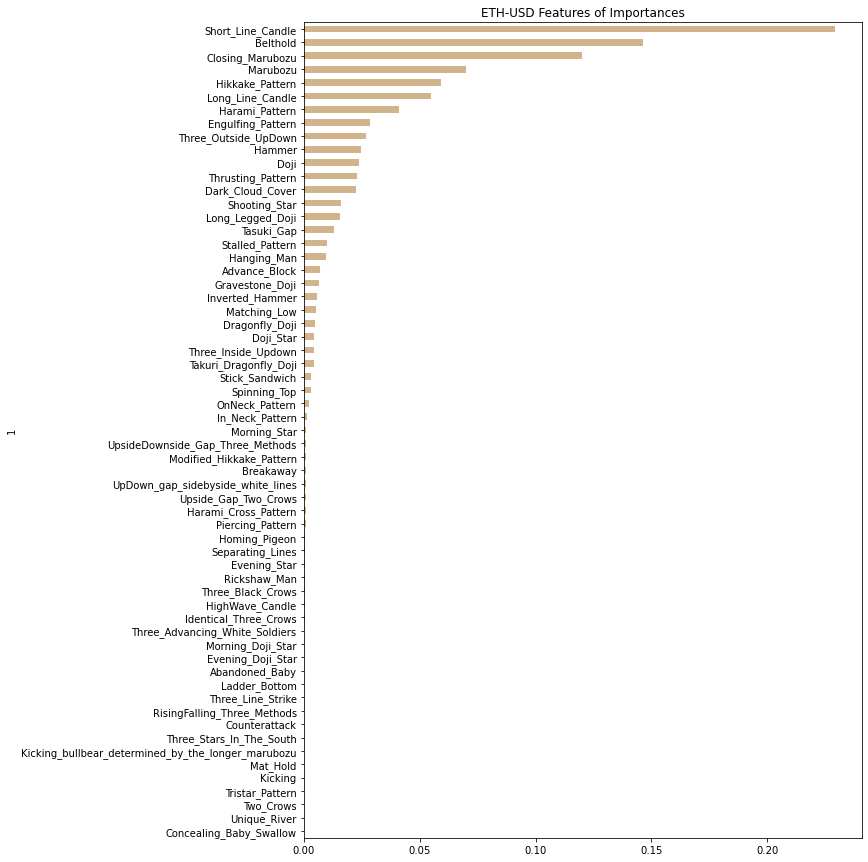

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.dropna()
importances_sorted.plot(kind='barh', figsize=(10,15), color='tan', title= f'{ticker} Features of Importances', legend=False, )